# Pymaceuticals Inc.
---

### Analysis

- The drug regimens Capomulin and Ramicane had significantly lower tumor volume in comparison to the other drug regimens in this study. Capomulin and Ramicane had an average tumor volume between 40.68 mm3 and 40.21 mm3 whereas the other regimens had an average tumor volume 52.32 mm3 or greater.

- For mouse l509 there was improvement on tumor reduction over time while taking the Capomulin drug regimen.  There was an 8 mm3 drop at day 35 of treatment.

- The study also found a stong positive correlation between a mouse's weight and its tumor volume.
 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [37]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study_duplicate = mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"],keep = False)]

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_drop = mouse_study[mouse_study['Mouse ID'] != 'g989']
mouse_study_drop.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [41]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_drop["Mouse ID"].unique())

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = mouse_study_drop.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = mouse_study_drop.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = mouse_study_drop.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor = mouse_study_drop.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = mouse_study_drop.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor,
    "Median Tumor Volume":median_tumor,
    "Tumor Volume Variance":var_tumor,
    "Tumor Volume Std. Dev.":std_tumor,
    "Tumor Volume Std. Err.":sem_tumor
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_single = mouse_study_drop.groupby("Drug Regimen")
summary_stats_single_results = summary_stats_single.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary_stats_single_results

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

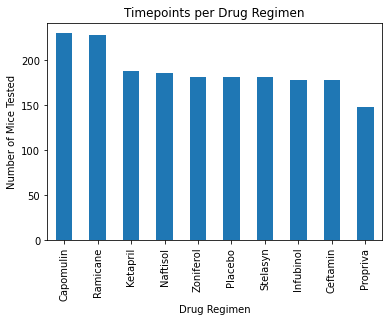

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treatment_totals = mouse_study_drop["Drug Regimen"].value_counts()

treatment_totals.plot(kind = "bar")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

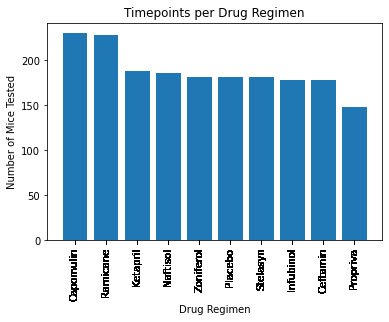

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_drop["Drug Regimen"].value_counts().index
y_axis = mouse_study_drop["Drug Regimen"].value_counts()

plt.bar(x_axis,y_axis, alpha=1.0, align="center")
plt.xticks(mouse_study_drop['Drug Regimen'],rotation="vertical")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


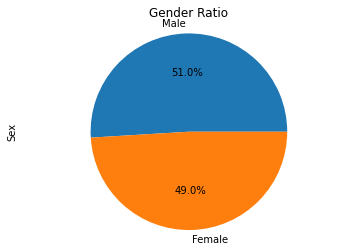

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_sum = pd.value_counts(mouse_study_drop["Sex"])

gender_pie = gender_sum.plot(kind="pie",autopct="%1.1f%%")
gender_pie.set_title("Gender Ratio")
gender_pie.set_ylabel("Sex") 
plt.axis("equal")
plt.show()

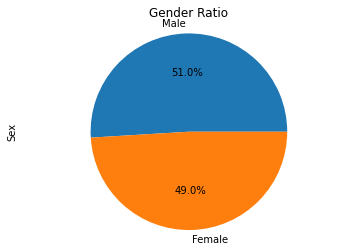

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size = mouse_study_drop ["Sex"].value_counts()

plt.pie(size.values, labels=size.index.values, autopct='%1.1f%%')
plt.title("Gender Ratio")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=mouse_study_drop.groupby('Mouse ID')
last_timepoint=last_timepoint['Timepoint'].max()
last_timepoint_df=mouse_study_drop.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().to_frame()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merge=last_timepoint_df.merge(mouse_study_drop, on=['Timepoint', 'Mouse ID'])
last_timepoint_merge2=last_timepoint_merge.loc[(
    last_timepoint_merge['Drug Regimen']=='Capomulin') 
    | (last_timepoint_merge['Drug Regimen']=='Ramicane') 
    | (last_timepoint_merge['Drug Regimen']=='Infubinol')
    | (last_timepoint_merge['Drug Regimen']=='Ceftamin')]
final_timepoint=last_timepoint_merge2[['Timepoint', 'Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_timepoint=final_timepoint.sort_values('Drug Regimen')
final_timepoint.head()

,Timepoint,Mouse ID,Drug Regimen,Tumor Volume (mm3)
115,45,l897,Capomulin,38.846876
85,45,j119,Capomulin,38.125164
87,35,j246,Capomulin,38.753265
192,45,u364,Capomulin,31.023923
66,45,g316,Capomulin,40.159220


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_treatment_data = final_timepoint.loc[final_timepoint["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
  
    # add subset 
    tumor_volume_data.append(tumor_treatment_data)
    
# Determine outliers using upper and lower bounds
quartile = tumor_treatment_data.quantile([0.25,0.5,0.75])
lowerq = quartile[0.25]
upperq = quartile[0.75]
iqr = upperq-lowerq
median = quartile[0.50]
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    

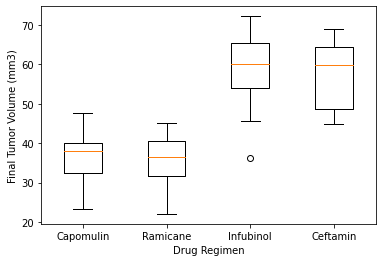

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_volume_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()


## Line and Scatter Plots

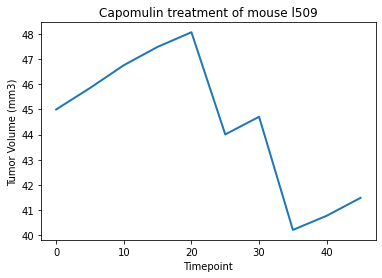

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_study_drop.loc[mouse_study_drop["Drug Regimen"] == "Capomulin",:]
line_plot = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509",:]
x_axis = line_plot["Timepoint"]
tumor_size = line_plot["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, tumor_size,linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


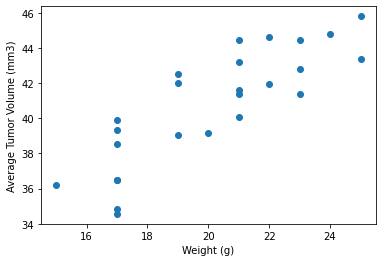

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


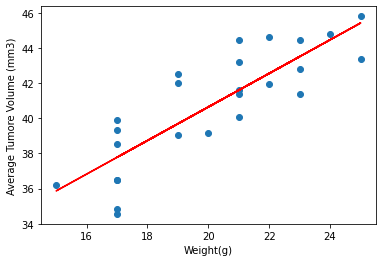

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

linear_model=st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])

mouse_weight = capomulin_avg["Weight (g)"]
tumor_volume = capomulin_avg["Tumor Volume (mm3)"]

(slope, intercept,rvalue,pvalue,stderr)=st.linregress(mouse_weight,tumor_volume)
regress_value = slope * mouse_weight + intercept

plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight,regress_value,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumore Volume (mm3)")
plt.show()

